# Task 2.1P: ML Development using Python

## Name: Muhammad Sohaib bin Kashif
## ID: 221023977
## Target Grade: Credit (concerning this task; Overall is HD!)

### Section 1: ML Practical

#### Part 1: Loading all the Python libraries 

In [5]:
#Importing library for loading the data into Python
import pandas as pd

#Importing library for Pre-processing of the data
from sklearn import preprocessing

#Importing library for getting all the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing library for splitting the data for learning and testing phases
from sklearn.model_selection import train_test_split

#Importing library for getting all the metrics for performance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Importing library for saving the models with the results
import pickle
import os
import zipfile

#### Part 2a: Data Ingestion and Preprocessing 

In [6]:
#Loading the dataset and print the data types of the columns...
data = pd.read_csv("data1.csv")
df = data.infer_objects()
print(df.dtypes[0:14])

f1      int64
f2     object
f3      int64
f4     object
f5      int64
f6     object
f7     object
f8     object
f9     object
f10    object
f11     int64
f12     int64
f13     int64
f14    object
dtype: object


In [7]:
# Removing the empty instances (or instances with white columns) of the dataset (lines in the file)
for i in range (0,14):
    if df.dtypes[i] != 'int64':
        data.iloc[:,i] = df.iloc[:,i].map(lambda x:x.strip())
array = data
array.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [8]:
# Seperating the input columns and the target (output) columns...
inputs = array.drop('class', axis='columns')
target = array['class']

In [9]:
inputs

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [10]:
target

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: class, Length: 32561, dtype: int64

In [11]:
#Converting categorical variables into non-categorical counterparts...

labelenc = preprocessing.LabelEncoder()

X= inputs.values
Y= target.values

for i in range (0,14):
    X[:,i] = labelenc.fit_transform(X[:,i])
    
#This is how X (input array) and Y (output array) now looks like...
print(X)

[[22 7 2671 ... 0 39 39]
 [33 6 2926 ... 0 12 39]
 [21 4 14086 ... 0 39 39]
 ...
 [41 4 7883 ... 0 39 39]
 [5 4 12881 ... 0 19 39]
 [35 5 17825 ... 0 39 39]]


In [12]:
print(Y)

[1 1 1 ... 1 1 0]


#### Part 2b: Creating a new Dataset with encoded data 

In [13]:
array2 = data

In [14]:
inputs = array2.drop('class', axis='columns')

In [15]:
X= inputs.values

In [17]:
labelenc = preprocessing.LabelEncoder()

for i in range (0,14):
    X[:,i] = labelenc.fit_transform(X[:,i])
    
print(X)

[[22 7 2671 ... 0 39 39]
 [33 6 2926 ... 0 12 39]
 [21 4 14086 ... 0 39 39]
 ...
 [41 4 7883 ... 0 39 39]
 [5 4 12881 ... 0 19 39]
 [35 5 17825 ... 0 39 39]]


In [19]:
df = pd.DataFrame(X)
df.to_csv("data1_test.csv")

#### Part 3: Splitting the Dataset

In [ ]:
# Splitting the dataset into a Validation Set...
test_ratio = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = test_ratio)

In [ ]:
#Visualizing the shape of the Training Dataset...
print(X_train.shape)
print(Y_train.shape)

(26048, 14)
(26048,)


In [ ]:
#Visualizing the shape of the Testing Dataset...
print(X_test.shape)
print(Y_test.shape)

(6513, 14)
(6513,)


In [ ]:
#Initializing our models as M1 (Decision Tree) and M2 respectively...
M1 = DecisionTreeClassifier(criterion='entropy',max_features=13,max_depth=10)
M2 = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=2, random_state=0)

#### Part 4: Fitting and Predicting the Models

In [ ]:
#Fitting and Testing the Decision Tree Model (M1)...
M1 = M1.fit(X_train,Y_train)
M1_pred = M1.predict(X_test)

In [ ]:
#Fitting and Testing the Random Forest Model (M2)...
M2 = M2.fit(X_train,Y_train.T)
M2_pred = M2.predict(X_test)

#### Part 5: Evaluation Metrics 

In [ ]:
print("--------------------Model 1: Decision Tree--------------------------")
print("Accuracy Score: ", accuracy_score(Y_test,M1_pred)*100,"%")
print("Confusion Matrix: \n", confusion_matrix(Y_test,M1_pred))

--------------------Model 1: Decision Tree--------------------------
Accuracy Score:  85.2141870105942 %
Confusion Matrix: 
 [[ 821  715]
 [ 248 4729]]


In [ ]:
print("--------------------Model 2: Random Forest--------------------------")
print("Accuracy Score: ", accuracy_score(Y_test,M2_pred)*100,"%")
print("Confusion Matrix: ", confusion_matrix(Y_test,M2_pred))

--------------------Model 2: Random Forest--------------------------
Accuracy Score:  79.37970213419315 %
Confusion Matrix:  [[ 193 1343]
 [   0 4977]]


#### Part 6: Saving the Models

In [ ]:
#Saving the first Model into a Pickle File...
print("Export the model to M1.pkl")
f1= open('M1.pkl','wb')
pickle.dump(M1,f1)
f1.close

Export the model to M1.pkl


<function BufferedWriter.close>

In [ ]:
#Saving the first Model into a Zip File...
zipfile.ZipFile('model1.zip',mode='w').write('M1.pkl')

In [ ]:
#Saving the second Model into a Pickle File...
print("Export the model to M2.pkl")
f2= open('M2.pkl','wb')
pickle.dump(M2,f2)
f2.close

Export the model to M2.pkl


<function BufferedWriter.close>

In [ ]:
#Saving the first Model into a Zip File...
zipfile.ZipFile('model2.zip',mode='w').write('M1.pkl')

### Section 2: Task report

1. What is the selected dataset and what is related problem for this dataset? You need to provide details of datasets, dataset description, what are the features, output (class label) and discuss the problem needs to be solved by machine learning model. (Minimum 200 words)

"The following dataset uses census data to basically find patterns and predict whether the person earns more than 50,000 dollars per annum. The dataset is derived from the UCI's Machine Learning Datasets. The dataset was extracted by Barry Becker from the 1994 Census database."

"The following dataset has around 13 features used to determine a person's earning. These are shown below: "

- **Age:** Age of the person (continous in nature)
- **Workclass:** Which working class does the person belong to? (e.g. Private, Self-employed, State-Gov, Federal-Gov)
- **fnlwgt:** Stands for 'Final Weight' (Continous in nature).
- **Education:** The highest level of education the person had (e.g. High School, Master's, PhD, Bachelor's).
- **Education-num:** The number of years a person has been educated.
- **Marital Status:** The current marital status of a person (e.g. Married, Seperated, Divorced, Single).
- **Occupation:** The current job position of a person (e.g. Tech-Support, Sales, Exec-Managerial, Transport-moving, Armed Forces).
- **Relationship:** Is the person in any relationship with the person who is responsible for earning (e.g. Wife, Own-child, Husband, Unmarried).
- **Race:** Ethnicity of a person (e.g. Caucasian, Hispanic, African-American, Amer-Indian-Eskimo).
- **Sex:** Gender of the person.
- **Capital-Gain:** Continous in Nature.
- **Capital-Loss:** Continous in Nature.
- **Hours-per-Week:** How many hours does a person works in a week? (Continous in Nature)
- **Native Country:** Country of Origin/Birth.
- **Class:** The output class of the algorihtm which identifies whether the person has or has not the income more than comparison.

"Essentially the problem we have a dataset for determining a person's annual income and we are using Machine Learning Algorithms to utilize the insights of the dataset, in classifying people based on their annual income."

2. You need to provide the screenshot of the built ML pipeline (Data ingestion, Data preparation, model training and evaluating the model). You need to provide explanation for cell by cell of the code. 

" Our following Python Notebook is divided into six parts as far as building the Machine Learning Algorithm is concerned. These are following parts enlisted:"
- Part 1: Loading all the Python libraries
- Part 2: Data Ingestion and Preprocessing 
- Part 3: Splitting the Dataset
- Part 4: Fitting and Predicting all the Models
- Part 5: Evaluation Metrics
- Part 6: Savings the Models

"However, please note that this is the Machine Learning Pipeline I have made for both models. This is as follows:"

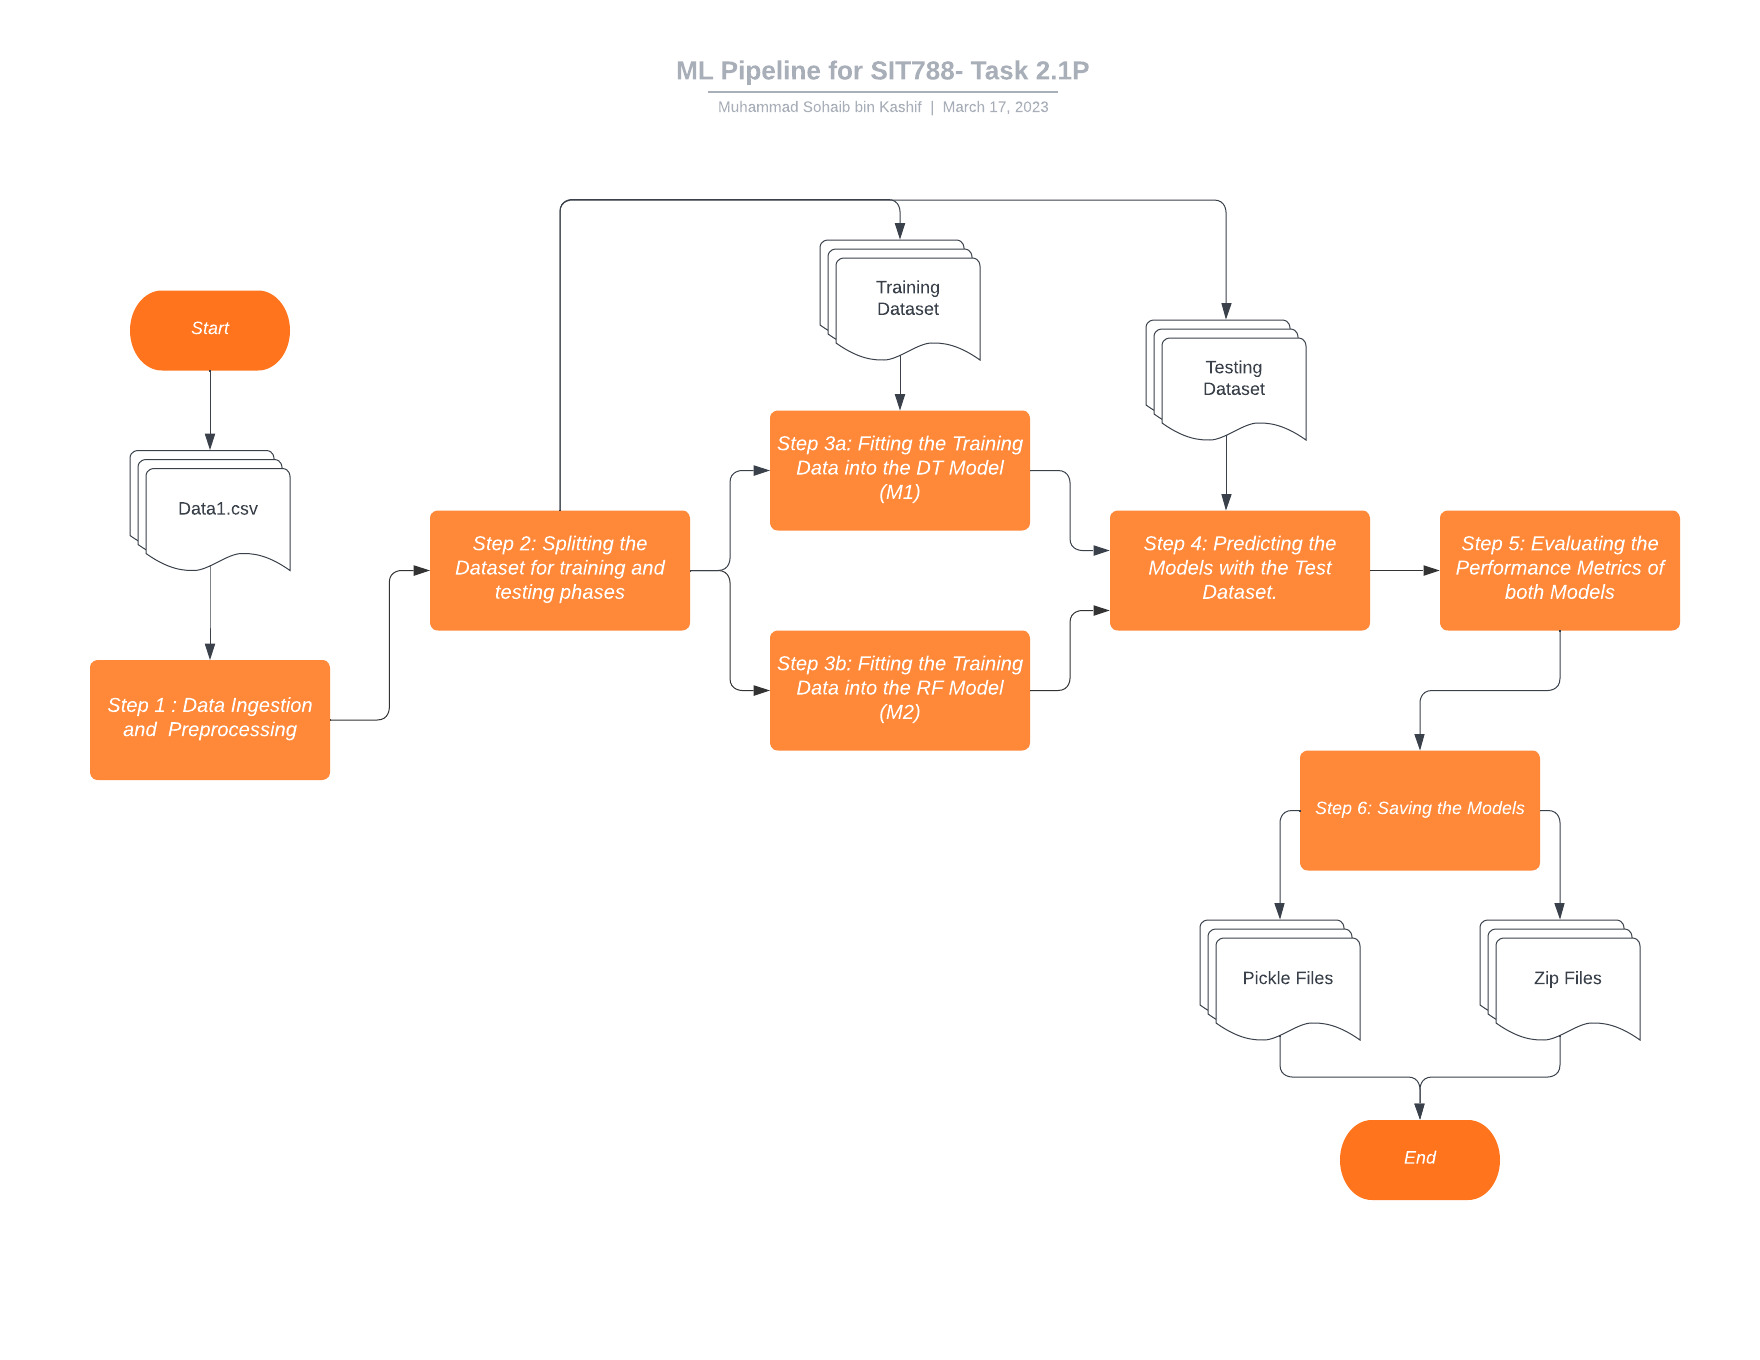

"Please also note that I also created a cell-by-cell explanation of all the steps taken to achieve the classification algorithm implemented correctly."

3. What is the performance of the build model/ models (Based on your target grade)? You need to provide discussion and justification of how the model is performing (discuss different metrics like accuracy, confusion matrix, etc.) based on the selected dataset.

"Provided the current dataset, these are all the assessments made and all the conclusions drawn as follows: "

- M1 (Decision Tree Model) has an accuracy of 84.9% with the provided dataset while M2 (Random Forest Model) has a slightly less accuracy of 79.27%. This implies that the Decision Tree Model is a better classifier than the latter.

- We also used the confusion matrix to understand the how the data has been classified performance wise. So as we can see the cells in Part 5 , the Decision Tree has a better confusion matrix for it has classified more instances as either True Positives and True Negatives compared to the false instances than the second model. The first model also has classified more true positive instances compared to the second model. But one interesting thing is also that there are no false positives in the second model. This implies that the Precision of the second model is higher than that of the first model. We can also see that the recall of the first model is signifacntly more than the latter as there are more True positives than False negatives in the first model. As for the second model, there are more false negatives than true positives. In short, the first model is more less precise but more sensitive than the second model.

4. You need to compare the performance of the models (using different metrics) and provide justifications which model is performing better and why. 

"In this task, we were able to implement two different Machine Learning Algorithms and we brought them in comparison with one another based on the evaluation metrics. We used more metrics from this link (https://scikit-learn.org/stable/modules/model_evaluation.html) to further dive into this comparison between two models. So here's how the results came out: "

In [ ]:
#Importing more metrics for Model Evaluation...
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [ ]:
print("--------------------Model 1: Decision Tree--------------------------")
print("Hamming Loss: ", hamming_loss(Y_test,M1_pred)*100,"%")
print("F1 Score: ", f1_score(Y_test,M1_pred))
print("Average Precision Curve: ", average_precision_score(Y_test,M1_pred))

--------------------Model 1: Decision Tree--------------------------
Hamming Loss:  14.785812989405803 %
F1 Score:  0.9075904423759715
Average Precision Curve:  0.8634556564533764


In [ ]:
print("--------------------Model 2: Random Forests--------------------------")
print("Hamming Loss: ", hamming_loss(Y_test,M2_pred)*100,"%")
print("F1 Score: ", f1_score(Y_test,M2_pred))
print("Average Precision Curve: ", average_precision_score(Y_test,M2_pred))

--------------------Model 2: Random Forests--------------------------
Hamming Loss:  20.620297865806847 %
F1 Score:  0.881118881118881
Average Precision Curve:  0.7875


"Let's recap on the following metrics and we also concludes between our models as well: "

-**Hamming Loss:** It is defined as the average Hamming loss or Hamming distance between two sets of samples. This is shown as in the picture below:

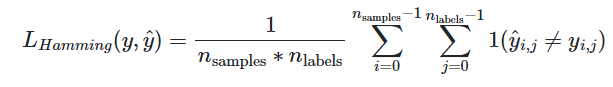

In our case, we can see that there is more Hamming Loss in the second Loss than in the first Model. So our first Model is working better in this case.

-**F1 Score:** F1 score is essentially a harmonic mean  between precision and recall. If the F1 score reaches its value at 1, it's considered the best model and likewise the worst score for a model is 0. It is defined as:

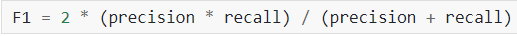

In our case, we can see that the first model is marginally better than the second model in terms of F1 Scores.

-**Average Precison Curve:** This curve summarizes a precision-recall curve (another metrics used for evaluation), as the weighted mean of precisions achieved at each decision threshold. From the above results, we can see that the first model has a greater curve than the latter. The first Model has as AP of 88% with the latter being 78%.

In all the three cases above, we can see that the first model has an overall better performance than the second model.

## References

https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5

https://scikit-learn.org/stable/modules/model_evaluation.html